<a href="https://colab.research.google.com/github/kugmax/tensorflow_learn/blob/master/One_layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from sklearn import datasets

from tensorboardcolab import *

Using TensorFlow backend.


In [2]:
tbc=TensorBoardColab()

Wait for 8 seconds...
TensorBoard link:
http://7b4dfd04.ngrok.io


In [3]:
iris = datasets.load_iris()
len(iris.data)

150

In [0]:
x_vals = np.array([x[0:3] for x in iris.data ])
y_vals = np.array([x[3] for x in iris.data ])
sess = tf.Session()

In [0]:
seed = 2
tf.set_random_seed(seed)
np.random.seed(seed)

In [0]:
train_indices = np.random.choice(len(x_vals), round(len(x_vals) * 0.8), replace=False)
test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices) ))

In [7]:
x_train = x_vals[train_indices]
y_train = y_vals[train_indices]

x_test = x_vals[test_indices]
y_test = y_vals[test_indices]

(x_train.shape, y_train.shape,  x_test.shape, y_test.shape)

((120, 3), (120,), (30, 3), (30,))

In [0]:
def normalize_cols(m):
  col_max = m.max(axis=0)
  col_min = m.min(axis=0)
  return (m - col_min) / (col_max - col_min)

In [0]:
x_train = np.nan_to_num(normalize_cols(x_train))
x_test = np.nan_to_num(normalize_cols(x_test))

In [0]:
batch_size = 50
x = tf.placeholder(shape=[None, 3], dtype=tf.float32)
y = tf.placeholder(shape=[None, 1], dtype=tf.float32)

In [0]:
hidden_layers_nodes = 5

with tf.name_scope("layer1"):
  a1 = tf.Variable(tf.random_normal(shape=[3, hidden_layers_nodes]))
  b1 = tf.Variable(tf.random_normal(shape=[hidden_layers_nodes]))
  hidden_output = tf.nn.relu(tf.add(tf.matmul(x, a1), b1))

# hidden_output = tf.sigmoid(tf.add(tf.matmul(x, a1), b1))

with tf.name_scope("layer2"):
  a2 = tf.Variable(tf.random_normal(shape=[hidden_layers_nodes, 1]))
  b2 = tf.Variable(tf.random_normal(shape=[1]))
  final_output = tf.nn.relu(tf.add(tf.matmul(hidden_output, a2), b2))

# final_output = tf.sigmoid(tf.add(tf.matmul(hidden_output, a2), b2))

In [0]:
with tf.name_scope("loss"):
  loss = tf.reduce_mean(tf.square(y - final_output))

In [0]:
optimizer = tf.train.GradientDescentOptimizer(0.005)
train_step = optimizer.minimize(loss)

In [0]:
init = tf.global_variables_initializer()
sess.run(init)

In [15]:
train_loss = []
test_loss = []

for i in range(500):
  rand_index = np.random.choice(len(x_train), size=batch_size)    
  
  rand_x = x_train[rand_index]
  rand_y = np.transpose([y_train[rand_index]])
  
  sess.run(train_step, feed_dict={x: rand_x, y: rand_y})
  
  train_temp_loss = sess.run(loss, feed_dict={x: rand_x, y: rand_y})
  train_loss.append(np.sqrt(train_temp_loss))
  
  test_temp_loss = sess.run(loss, feed_dict={x: x_test, y: np.transpose([y_test])})
  test_loss.append(np.sqrt(test_temp_loss))
  
  if (i + 1) % 50 == 0:
    print(str(i + 1) + " train loss: " + str(train_temp_loss) + " test loss: " + str(test_temp_loss))

50 train loss: 0.2808529 test loss: 0.39188248
100 train loss: 0.17073601 test loss: 0.14783885
150 train loss: 0.090729386 test loss: 0.07818104
200 train loss: 0.075342156 test loss: 0.06267093
250 train loss: 0.077748805 test loss: 0.06355045
300 train loss: 0.045896903 test loss: 0.0622576
350 train loss: 0.048609886 test loss: 0.06390001
400 train loss: 0.023646815 test loss: 0.06419827
450 train loss: 0.051018633 test loss: 0.066801
500 train loss: 0.050177235 test loss: 0.06450997


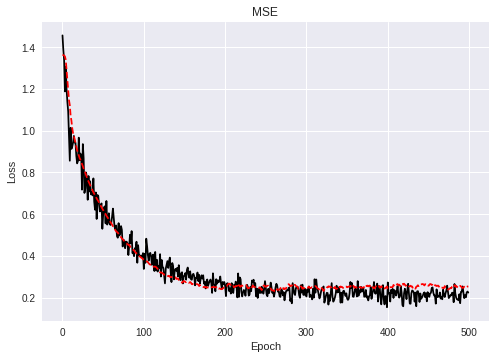

In [16]:
plt.plot(train_loss, 'k-', label='Train loss')
plt.plot(test_loss, 'r--', label='Test loss')
plt.title('MSE')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [0]:
train_writer = tbc.get_writer();
train_writer.add_graph(sess.graph)

train_writer.flush()
tbc.close()